# SIO-211A Midterm

In [1]:
%matplotlib inline

In [2]:
# imports
import os
import numpy as np

import pandas

import h5py

from matplotlib import pyplot as plt
import seaborn as sns

import unyt

In [3]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

In [12]:

def set_fontsize(ax,fsz):
    '''
    Generate a Table of columns and so on
    Restrict to those systems where flg_clm > 0

    Parameters
    ----------
    ax : Matplotlib ax class
    fsz : float
      Font size
    '''
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fsz)


# Problem 1

# (i) Simple Gravity Waves

## (a) Governing Equations

## $\frac{\partial u}{\partial t} = - g \frac{\partial \eta}{\partial x}$

## $\frac{\partial v}{\partial t} = - g \frac{\partial \eta}{\partial y}$

## $\frac{\partial \eta}{\partial t} = - H \left ( \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} \right )$

### with $g$ the gravitaional acceleration and $H$ the depth

### Massaging...

## $\frac{\partial^2 \eta}{\partial t^2} = g H \left [ \frac{\partial^2 \eta}{\partial x^2} + \frac{\partial^2 \eta}{\partial y^2} \right ]$

## (b) Restoring force

### Here it is purely gravity

## (c) Dispersion relationship

## $\omega^2 = gH \, k^2$

### with $k^2 = k_x^2 + k_y^2$

## (d) Phase velocity

## $C_p = \omega/k = \sqrt{gH}$

## (e) Group velocity

## $C_g = d\omega/dk = \sqrt{gH}$

# (ii) Coriolis included

## (a) Governing Equations

## $\frac{\partial u}{\partial t} = - g \frac{\partial \eta}{\partial x} + fv$

## $\frac{\partial v}{\partial t} = - g \frac{\partial \eta}{\partial y} - fu$

## $\frac{\partial \eta}{\partial t} = - H \left ( \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} \right )$

### with $f$ the Coriolis parameter

## (b) Restoring force

### Gravity + Coriolis force

## (c) Dispersion relationship

## $\omega^2 = gH \, k^2 + f^2$

## (d) Phase velocity

## $C_p = \omega/k = \sqrt{gH \,k^2 + f^2}/k$

## (e) Group velocity

## $C_g = d\omega/dk = \frac{gH k}{\sqrt{gH \, k^2 + f^2}}$

# (iii) Kelvin Waves

## (a) Governing Equations -- for the case of $u=0$

## $g \frac{\partial \eta}{\partial x} = fv$

## $\frac{\partial v}{\partial t} = - g \frac{\partial \eta}{\partial y}$

## $\frac{\partial \eta}{\partial t} = - H \frac{\partial v}{\partial y}$

## (b) Restoring force

### Gravity + Coriolis force

## (c) Dispersion relationship

## $\omega^2 = gH \, k_y^2$

## (d), (e) Phase, Group Velocity

## $C_p = C_g = \sqrt{gH}$

# (iv) Rossby Waves

## (a) Governing Equations 

### Our main one is:

## $\frac{d}{dt} \left [ \zeta - \frac{f\eta}{H} \right ] + \beta v = 0$

### with $\zeta$ the relative vorticity and $\beta$ describes the change in $f$ with $y$

### We introduced the stream function:  $\psi = g \eta /f$ and recovered:

## $\frac{\partial}{\partial t} \left [ \nabla^2 \psi - \frac{1}{a^2} \psi \right ] + \beta \frac{\partial \psi}{\partial x} = 0$

### with $a$ the Rossby radius of deformation.

## (b) Restoring force

### Coriolis force (and PV conservation?)

## (c) Dispersion relation

## $\omega = \frac{- k_x \beta}{k_H^2 + k_R^2}$

### with $k_H^2 = k_x^2 + k_y^2$ and $k_R = 1/a$

## (d) Phase velocity

## $C_{p,x} = \frac{-\beta}{k_H^2 + k_R^2}$

### i.e. westward travelling!

## (e) Group velocity

## $C_{g,x} = \frac{-\beta}{k_H^2 + k_R^2} + \frac{2 k_x^2 \beta}{[k_H^2 + k_R^2]^2}$

----

# Problem 2

In [4]:
beta = 2e-11 / unyt.m / unyt.s
f = 8e-5 / unyt.s

In [5]:
g = 9.8 * unyt.m / unyt.s**2
H = 1 * unyt.km

In [6]:
# Rossby radius
a = np.sqrt(g*H)/f
a.to('km')

unyt_quantity(1237.43686708, 'km')

## Define wave numbers

In [17]:
k_x = 10**np.linspace(-5., 0., 200) / unyt.km

## Calculate dispersion relations

In [18]:
omega_SWE = np.sqrt(g*H * k_x**2).to('Hz')
omega_coriolis = np.sqrt(g*H * k_x**2 + f**2).to('Hz')

In [19]:
omega_Rossby = np.abs((-k_x * beta / (k_x**2 + 1/a**2)).to('Hz'))

## Plot

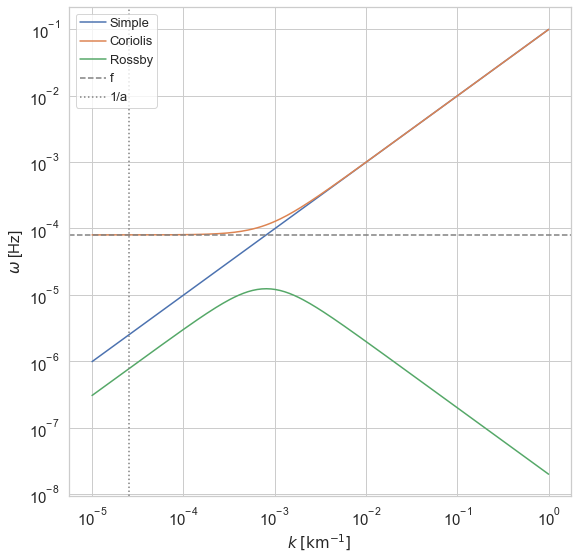

In [20]:
fig = plt.figure(figsize=(9,9))
ax = plt.gca()
#
ax.plot(k_x, omega_SWE, label='Simple')
ax.plot(k_x, omega_coriolis, label='Coriolis')
ax.plot(k_x, omega_Rossby, label='Rossby')

#
ax.set_xlabel(r'$k \; \rm [km^{-1}]$ ')
ax.set_ylabel(r'$\omega$ [Hz]')
#
ax.set_xscale('log')
ax.set_yscale('log')
#
ax.axhline(f, ls='--', color='gray', label='f')
ax.axvline(1/a, ls=':', color='gray', label='1/a')
#
legend = plt.legend(loc='upper left', scatterpoints=1, borderpad=0.3,
                    handletextpad=0.3, fontsize=13, numpoints=1)
#
set_fontsize(ax, 15.)
#
plt.show()